# Group No: 10 

# Participants List: 
# 1.  Sri Lalana 
# 2.  Parsis Presswala 
# 3.  Trapti Khandelwal 

# Problem Statement: This model can used to classify the genre based on the movie plot which helps the audience to make choices accordingly

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_excel("movies_project_final.xls")
df.head(5)

,Title,Genre,Synopsis,Year,Duration,Caste,Rating,Language
0,The Shawshank Redemption,Drama,Two imprisoned men bond over a number of years...,1994,142 min,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",9.3,English
1,The Dark Knight,"Action, Crime, Drama",When the menace known as the Joker wreaks havo...,2008,152 min,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",9.0,English
2,Inception,"Action, Adventure, Sci-Fi",A thief who steals corporate secrets through t...,2010,148 min,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",8.8,English
3,Fight Club,Drama,An insomniac office worker and a devil-may-car...,1999,139 min,"Brad Pitt, Edward Norton, Meat Loaf, Zach Grenier",8.8,English
4,Pulp Fiction,"Crime, Drama","The lives of two mob hitmen, a boxer, a gangst...",1994,154 min,"John Travolta, Uma Thurman, Samuel L. Jackson,...",8.9,English


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5596 entries, 0 to 5595
Data columns (total 8 columns):
Title       5596 non-null object
Genre       4643 non-null object
Synopsis    5594 non-null object
Year        5000 non-null object
Duration    5000 non-null object
Caste       4996 non-null object
Rating      5000 non-null float64
Language    5000 non-null object
dtypes: float64(1), object(7)
memory usage: 349.9+ KB


In [4]:
df.isnull().sum()

Title         0
Genre       953
Synopsis      2
Year        596
Duration    596
Caste       600
Rating      596
Language    596
dtype: int64

In [5]:
df.shape

(5596, 8)

In [6]:
df = df[pd.notnull(df['Synopsis'])]
df.isnull().sum()

Title         0
Genre       953
Synopsis      0
Year        594
Duration    594
Caste       598
Rating      594
Language    594
dtype: int64

In [7]:
df = df[pd.notnull(df['Genre'])]
df.isnull().sum()

Title         0
Genre         0
Synopsis      0
Year        594
Duration    594
Caste       597
Rating      594
Language    594
dtype: int64

In [8]:
df.shape

(4641, 8)

In [9]:
import nltk
import re
import seaborn as sns
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

pd.set_option('display.max_colwidth', 300)

In [10]:
import warnings
warnings.filterwarnings("ignore")
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\parsi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\parsi\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\parsi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [11]:
df.head()

,Title,Genre,Synopsis,Year,Duration,Caste,Rating,Language
0,The Shawshank Redemption,Drama,"Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.",1994,142 min,"Tim Robbins, Morgan Freeman, Bob Gunton, William Sadler",9.3,English
1,The Dark Knight,"Action, Crime, Drama","When the menace known as the Joker wreaks havoc and chaos on the people of Gotham, Batman must accept one of the greatest psychological and physical tests of his ability to fight injustice.",2008,152 min,"Christian Bale, Heath Ledger, Aaron Eckhart, Michael Caine",9.0,English
2,Inception,"Action, Adventure, Sci-Fi",A thief who steals corporate secrets through the use of dream-sharing technology is given the inverse task of planting an idea into the mind of a C.E.O.,2010,148 min,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen Page, Ken Watanabe",8.8,English
3,Fight Club,Drama,"An insomniac office worker and a devil-may-care soapmaker form an underground fight club that evolves into something much, much more.",1999,139 min,"Brad Pitt, Edward Norton, Meat Loaf, Zach Grenier",8.8,English
4,Pulp Fiction,"Crime, Drama","The lives of two mob hitmen, a boxer, a gangster and his wife, and a pair of diner bandits intertwine in four tales of violence and redemption.",1994,154 min,"John Travolta, Uma Thurman, Samuel L. Jackson, Bruce Willis",8.9,English


In [12]:
genres = [] 

# extract genres
for i in df['Genre']:
    s = [x.strip() for x in i.split(',')]    
    genres.append(s) 
      
df['genre_new'] = genres
df['genre_new']

0                           [Drama]
1            [Action, Crime, Drama]
2       [Action, Adventure, Sci-Fi]
3                           [Drama]
4                    [Crime, Drama]
                   ...             
5591                        [Drama]
5592     [Drama, Mystery, Thriller]
5593              [Drama, Thriller]
5594              [Crime, Thriller]
5595                [Comedy, Drama]
Name: genre_new, Length: 4641, dtype: object

In [13]:
# remove samples with 0 genre tags
df_new = df[~(df['Genre'].str.len() == 0)]
df_new.head()

,Title,Genre,Synopsis,Year,Duration,Caste,Rating,Language,genre_new
0,The Shawshank Redemption,Drama,"Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.",1994,142 min,"Tim Robbins, Morgan Freeman, Bob Gunton, William Sadler",9.3,English,[Drama]
1,The Dark Knight,"Action, Crime, Drama","When the menace known as the Joker wreaks havoc and chaos on the people of Gotham, Batman must accept one of the greatest psychological and physical tests of his ability to fight injustice.",2008,152 min,"Christian Bale, Heath Ledger, Aaron Eckhart, Michael Caine",9.0,English,"[Action, Crime, Drama]"
2,Inception,"Action, Adventure, Sci-Fi",A thief who steals corporate secrets through the use of dream-sharing technology is given the inverse task of planting an idea into the mind of a C.E.O.,2010,148 min,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen Page, Ken Watanabe",8.8,English,"[Action, Adventure, Sci-Fi]"
3,Fight Club,Drama,"An insomniac office worker and a devil-may-care soapmaker form an underground fight club that evolves into something much, much more.",1999,139 min,"Brad Pitt, Edward Norton, Meat Loaf, Zach Grenier",8.8,English,[Drama]
4,Pulp Fiction,"Crime, Drama","The lives of two mob hitmen, a boxer, a gangster and his wife, and a pair of diner bandits intertwine in four tales of violence and redemption.",1994,154 min,"John Travolta, Uma Thurman, Samuel L. Jackson, Bruce Willis",8.9,English,"[Crime, Drama]"


In [14]:
df_new.shape, df.shape

((4641, 9), (4641, 9))

In [15]:
#df.head()

In [16]:
# add to 'movies' dataframe  
# sum(df['genre_new'],[])
all_genres = sum(df['genre_new'],[])
len(set(all_genres))
#set(all_genres)

19

In [17]:
df.head()

,Title,Genre,Synopsis,Year,Duration,Caste,Rating,Language,genre_new
0,The Shawshank Redemption,Drama,"Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.",1994,142 min,"Tim Robbins, Morgan Freeman, Bob Gunton, William Sadler",9.3,English,[Drama]
1,The Dark Knight,"Action, Crime, Drama","When the menace known as the Joker wreaks havoc and chaos on the people of Gotham, Batman must accept one of the greatest psychological and physical tests of his ability to fight injustice.",2008,152 min,"Christian Bale, Heath Ledger, Aaron Eckhart, Michael Caine",9.0,English,"[Action, Crime, Drama]"
2,Inception,"Action, Adventure, Sci-Fi",A thief who steals corporate secrets through the use of dream-sharing technology is given the inverse task of planting an idea into the mind of a C.E.O.,2010,148 min,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen Page, Ken Watanabe",8.8,English,"[Action, Adventure, Sci-Fi]"
3,Fight Club,Drama,"An insomniac office worker and a devil-may-care soapmaker form an underground fight club that evolves into something much, much more.",1999,139 min,"Brad Pitt, Edward Norton, Meat Loaf, Zach Grenier",8.8,English,[Drama]
4,Pulp Fiction,"Crime, Drama","The lives of two mob hitmen, a boxer, a gangster and his wife, and a pair of diner bandits intertwine in four tales of violence and redemption.",1994,154 min,"John Travolta, Uma Thurman, Samuel L. Jackson, Bruce Willis",8.9,English,"[Crime, Drama]"


In [18]:
all_genres = nltk.FreqDist(all_genres) 

# create dataframe
all_genres_df = pd.DataFrame({'Genre': list(all_genres.keys()),'Count': list(all_genres.values())})

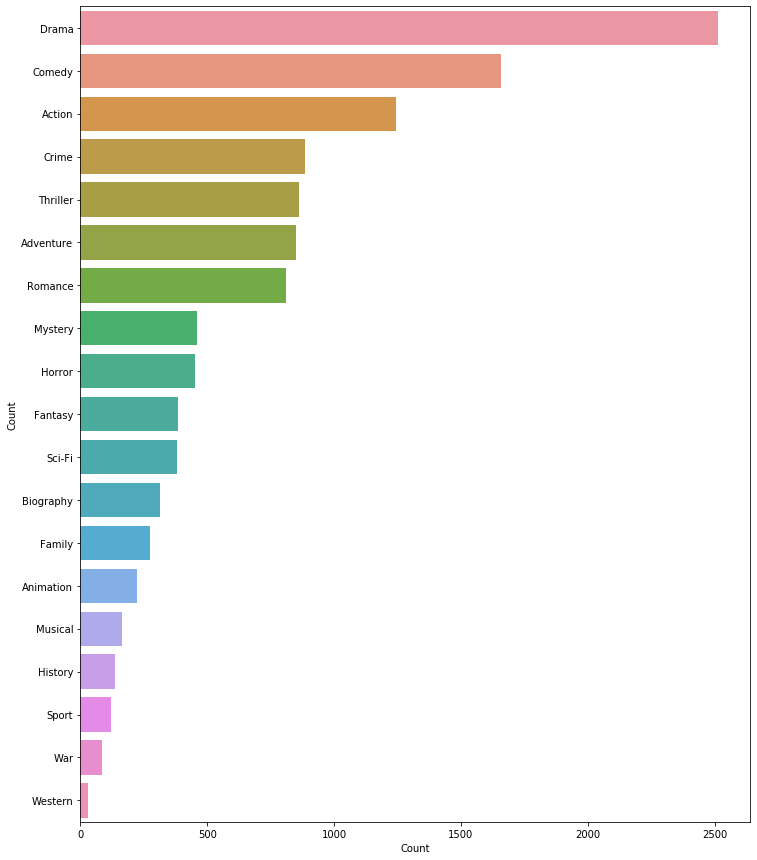

In [19]:
import seaborn as sns

g = all_genres_df.nlargest(columns="Count", n = 50) 
plt.figure(figsize=(12,15)) 
ax = sns.barplot(data=g, x= "Count", y = "Genre") 
ax.set(ylabel = 'Count') 
plt.show()

In [20]:
def clean_text(text):
    # remove backslash-apostrophe 
    text = re.sub("\'", "", text) 
    # remove everything except alphabets 
    text = re.sub("[^a-zA-Z]"," ",text) 
    # remove whitespaces 
    text = ' '.join(text.split()) 
    # convert text to lowercase 
    text = text.lower() 
    
    return text

In [21]:
#df['Synopsis_clean'] = df['Synopsis'].apply(clean_sentence)
df_new['clean_Synopsis'] = df_new['Synopsis'].apply(lambda x: clean_text(x))

In [22]:
df_new.head()

,Title,Genre,Synopsis,Year,Duration,Caste,Rating,Language,genre_new,clean_Synopsis
0,The Shawshank Redemption,Drama,"Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.",1994,142 min,"Tim Robbins, Morgan Freeman, Bob Gunton, William Sadler",9.3,English,[Drama],two imprisoned men bond over a number of years finding solace and eventual redemption through acts of common decency
1,The Dark Knight,"Action, Crime, Drama","When the menace known as the Joker wreaks havoc and chaos on the people of Gotham, Batman must accept one of the greatest psychological and physical tests of his ability to fight injustice.",2008,152 min,"Christian Bale, Heath Ledger, Aaron Eckhart, Michael Caine",9.0,English,"[Action, Crime, Drama]",when the menace known as the joker wreaks havoc and chaos on the people of gotham batman must accept one of the greatest psychological and physical tests of his ability to fight injustice
2,Inception,"Action, Adventure, Sci-Fi",A thief who steals corporate secrets through the use of dream-sharing technology is given the inverse task of planting an idea into the mind of a C.E.O.,2010,148 min,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen Page, Ken Watanabe",8.8,English,"[Action, Adventure, Sci-Fi]",a thief who steals corporate secrets through the use of dream sharing technology is given the inverse task of planting an idea into the mind of a c e o
3,Fight Club,Drama,"An insomniac office worker and a devil-may-care soapmaker form an underground fight club that evolves into something much, much more.",1999,139 min,"Brad Pitt, Edward Norton, Meat Loaf, Zach Grenier",8.8,English,[Drama],an insomniac office worker and a devil may care soapmaker form an underground fight club that evolves into something much much more
4,Pulp Fiction,"Crime, Drama","The lives of two mob hitmen, a boxer, a gangster and his wife, and a pair of diner bandits intertwine in four tales of violence and redemption.",1994,154 min,"John Travolta, Uma Thurman, Samuel L. Jackson, Bruce Willis",8.9,English,"[Crime, Drama]",the lives of two mob hitmen a boxer a gangster and his wife and a pair of diner bandits intertwine in four tales of violence and redemption


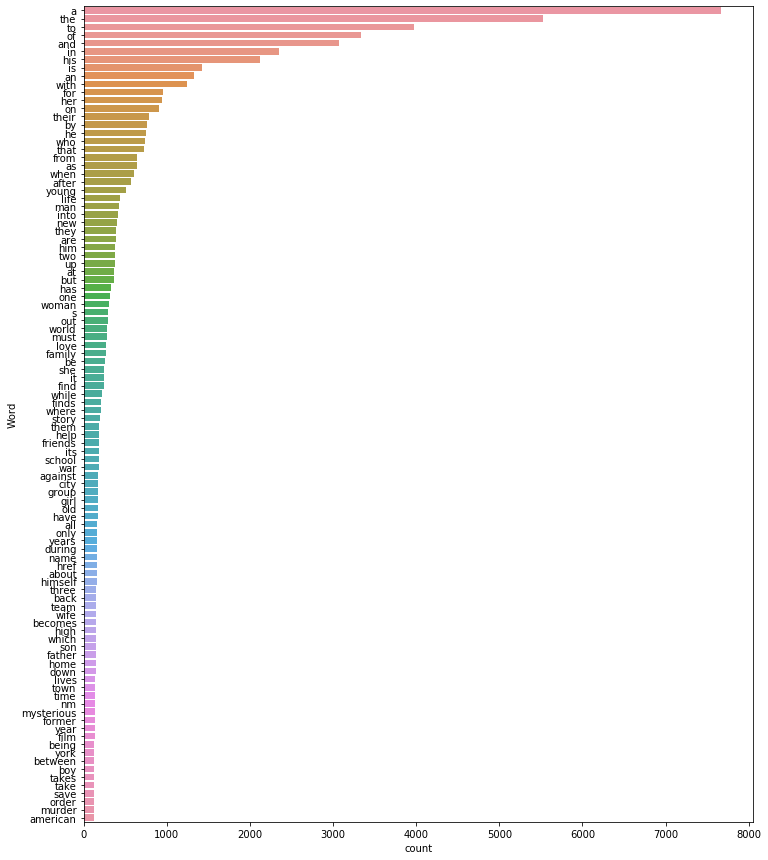

In [23]:
def freq_words(x, terms = 30): 
    all_words = ' '.join([text for text in x]) 
    all_words = all_words.split() 
    fdist = nltk.FreqDist(all_words) 
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 
  
    # selecting top 20 most frequent words 
    d = words_df.nlargest(columns="count", n = terms) 
  
    # visualize words and frequencies
    plt.figure(figsize=(12,15)) 
    ax = sns.barplot(data=d, x= "count", y = "word") 
    ax.set(ylabel = 'Word') 
    plt.show()
    
# print 100 most frequent words 
freq_words(df_new['clean_Synopsis'], 100)

In [24]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\parsi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# function to remove stopwords
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

df_new['clean_Synopsis'] = df_new['clean_Synopsis'].apply(lambda x: remove_stopwords(x))

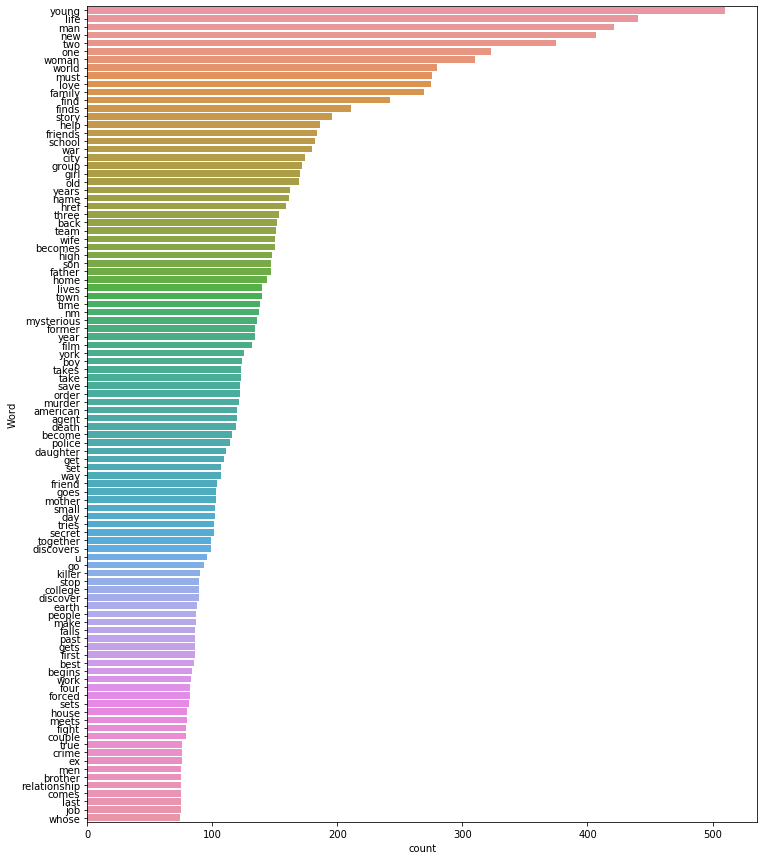

In [26]:
freq_words(df_new['clean_Synopsis'], 100)

### Converting Text to Features

In [27]:
from sklearn.preprocessing import MultiLabelBinarizer

multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(df_new['genre_new'])

# transform target variable
y = multilabel_binarizer.transform(df_new['genre_new'])
#len(y[0])
multilabel_binarizer.classes_

array(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War',
       'Western'], dtype=object)

In [28]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000)

### Splitting training and testing 

In [29]:
from sklearn.model_selection import train_test_split
# split dataset into training and validation set
xtrain, xval, ytrain, yval = train_test_split(df_new['clean_Synopsis'], y, test_size=0.2, random_state=10)

In [30]:
# print (xtrain)
# print (xval)
len(ytrain)
len (yval)

929

In [31]:
# create TF-IDF features 
xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain)
xval_tfidf = tfidf_vectorizer.transform(xval)

# LOGISTIC REGRESSION

In [32]:
from sklearn.linear_model import LogisticRegression

# Binary Relevance
from sklearn.multiclass import OneVsRestClassifier

# Performance metric
from sklearn.metrics import f1_score

In [33]:
lr = LogisticRegression(penalty='l2', random_state=10,max_iter=1000,class_weight='balanced')
clf_logistic = OneVsRestClassifier(lr)

In [34]:
# fit model on train data
clf_logistic.fit(xtrain_tfidf, ytrain)

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=1000,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=10,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [35]:
print (xtrain_tfidf.shape)
print (ytrain.shape)

(3712, 10000)
(3712, 19)


In [36]:
# make predictions for validation set
y_pred_logistic = clf_logistic.predict(xval_tfidf)

In [37]:
y_pred_logistic[23]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [38]:
multilabel_binarizer.inverse_transform(y_pred_logistic)[3]

('Action', 'Comedy', 'Crime', 'Thriller')

In [39]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
print ("F1 Score is:    ",f1_score(yval, y_pred_logistic, average="micro"))
print ("The Accuracy is:",accuracy_score(yval,y_pred_logistic))
print ()
p, r, f, s = precision_recall_fscore_support(yval, y_pred_logistic,average="micro",warn_for=('precision', 'recall', 'f-score'))
print ("f beta score    ",f)
print ("Precison:       ",p)
print ("Recall:         ",r)

F1 Score is:     0.5829909613804437
The Accuracy is: 0.11194833153928956

f beta score     0.5829909613804437
Precison:        0.5689655172413793
Recall:          0.5977253580454929


In [40]:
y_pred_prob = clf_logistic.predict_proba(xval_tfidf)
#y_pred_prob

In [41]:
t = 0.5 # threshold value
y_pred_new = (y_pred_prob >= t).astype(int)

In [42]:
# evaluate performance
print ("y_pred_new F1 score: ",f1_score(yval, y_pred_new, average="micro"))

y_pred_new F1 score:  0.5829909613804437


In [43]:
def infer_tags(q):
    q = clean_text(q)
    q = remove_stopwords(q)
    q_vec = tfidf_vectorizer.transform([q])
    q_pred = clf_logistic.predict(q_vec)
    return multilabel_binarizer.inverse_transform(q_pred)

In [44]:
for i in range(5): 
    k = xval.sample(1).index[0] 
    print("Movie: ", df['Title'][k], "\nPredicted genre: ", infer_tags(xval[k])), print("Actual genre: ",df['Genre'][k], "\n")

Movie:  Upside Down 
Predicted genre:  [('Drama', 'Romance')]
Actual genre:  Drama, Fantasy, Romance 

Movie:  Lolita 
Predicted genre:  [('Comedy', 'Drama', 'Romance')]
Actual genre:  Drama, Romance 

Movie:  Drillbit Taylor 
Predicted genre:  [('Action', 'Comedy')]
Actual genre:  Action, Comedy, Crime 

Movie:  Escape from New York 
Predicted genre:  [('Action', 'Crime', 'Thriller')]
Actual genre:  Action, Adventure, Sci-Fi 

Movie:  The Incredible Hulk 
Predicted genre:  [('Action', 'Adventure', 'Animation', 'Sci-Fi')]
Actual genre:  Action, Adventure, Sci-Fi 



## Conclusion: 

## We are using logistic regression with One vs Rest method.As it is multilabel classification, penalty='l1' is not supported, So we have to used penalty 'l2' or 'None'. With the penalty 'l2', we found better model. We have imbalance classes in our dataset, so we have applied class_weight. After applying logistic regression, we found accuracy with 11% and F1 Score with 58% amd also we got Precison 56.8% and recall 59.7%. 

# LogisticRegression with Cross Validation

In [45]:
from sklearn.model_selection import cross_val_score
print ("Logistic: ")
model1 = cross_val_score(clf_logistic,xtrain_tfidf, ytrain,scoring="accuracy",cv=15)
accuracy = model1.mean() * 100
print ("Acccuracy of Logistic is: ",accuracy)

Logistic: 
Acccuracy of Logistic is:  12.041813591049586


## Conclusion: 

## We tried to apply Cross validation on the previous Logistic model and we found 12.04% accuracy which is 1% more than previous model. 

# DECISION TREE

In [46]:
from sklearn.tree import DecisionTreeClassifier
clf_decision_tree = DecisionTreeClassifier(criterion='gini',splitter='random',random_state=10)
clf_decision_tree.fit(xtrain_tfidf,ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='random')

In [47]:
# make predictions for validation set
y_pred_decision_tree = clf_decision_tree.predict(xval_tfidf)

In [48]:
y_pred_decision_tree[23]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [49]:
multilabel_binarizer.inverse_transform(y_pred_decision_tree)[3]

('Action', 'Adventure', 'Sci-Fi')

In [50]:
# evaluate performance
from sklearn.metrics import accuracy_score
print ("The Accuracy is:",accuracy_score(yval,y_pred_decision_tree))
print ("F1 score:       ",f1_score(yval, y_pred_decision_tree, average="micro"))
print ()
p, r, f, s = precision_recall_fscore_support(yval, y_pred_decision_tree,average="micro",warn_for=('precision', 'recall', 'f-score'))
print ("f beta score    ",f)
print ("Precison:       ",p)
print ("Recall:         ",r)

The Accuracy is: 0.12378902045209902
F1 score:        0.4676382340334334

f beta score     0.4676382340334334
Precison:        0.47600349040139617
Recall:          0.45956192080876157


## Conclusion:

## After applying Logistic Regression, we tried Decision tree classifier. In which we have used gini criterion with random  splitter. From which we found same accuracy as Logistic Regression with Cross Validation 12%, but our f1 score falls slightly to 46.7%. Here we found 47.6% Precison while recall is 45.9%

In [51]:
#!pip install scikit-multilearn

## There are some specific methods to perform multilabel classification.            
### 1) Problem Transformation                                                                                        
### 2) Adaptated Algorithms

# 1) Problem Transformation

# USING BINARY RELEVANCE

In [52]:
# using binary relevance
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB

# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
clf1 = BinaryRelevance(GaussianNB())

# train
y_pred1 = clf1.fit(xtrain_tfidf, ytrain)

# predict
predictions1 = clf1.predict(xval_tfidf)

#print(y_pred1)
#print(predictions1)

In [53]:
from sklearn.metrics import accuracy_score
print("The Accuracy is:",accuracy_score(yval,predictions1))
# evaluate performance
print("The F1Score is: ",f1_score(yval, predictions1,average="micro"))
print ()
p, r, f, s = precision_recall_fscore_support(yval, predictions1,average="micro",warn_for=('precision', 'recall', 'f-score'))
print ("f beta score    ",f)
print ("Precison:       ",p)
print ("Recall:         ",r)

The Accuracy is: 0.09257265877287406
The F1Score is:  0.42516921534219104

f beta score     0.42516921534219104
Precison:        0.525077399380805
Recall:          0.35720303285593935


## Conclusion:

## We are using BinaryRelevance from problem_transform. In which we are using naive_bayes base claassifier. From which we got 9.2% accuracy, 42.5% f1 score, 52.5% Precision and 35.7% Recall.

# USING CLASSIFIER CHAINS

In [54]:
from skmultilearn.problem_transform import ClassifierChain
from sklearn.naive_bayes import GaussianNB

# initialize classifier chains multi-label classifier
# with a gaussian naive bayes base classifier
clf2 = ClassifierChain(GaussianNB())

# train
y_pred2=clf2.fit(xtrain_tfidf, ytrain)

# predict
predictions2 = clf2.predict(xval_tfidf)

In [60]:
print("The Accuracy is:",accuracy_score(yval,predictions2))
# evaluate performance
print("The F1Score is: ",f1_score(yval, predictions2,average="micro"))
print ()
p, r, f, s = precision_recall_fscore_support(yval, predictions2,average="micro",warn_for=('precision', 'recall', 'f-score'))
print ("f beta score    ",f)
print ("Precison:       ",p)
print ("Recall:         ",r)

The Accuracy is: 0.09472551130247578
The F1Score is:  0.42910915934755334

f beta score     0.42910915934755334
Precison:        0.5307262569832403
Recall:          0.36015164279696715


## Conclusion:

## We are using ClassifierChain from problem_transform with naive_bayes. From which we got 9.4% accuracy, 42.9% f1 score, 53% Precision and 36% Recall. Here we got almost same result as Binary relevance.

# USING LABEL POWERSET

In [56]:
from skmultilearn.problem_transform import LabelPowerset
from sklearn.naive_bayes import GaussianNB

# initialize Label Powerset multi-label classifier
# with a gaussian naive bayes base classifier
clf3 = LabelPowerset(GaussianNB())

# train
clf3.fit(xtrain_tfidf, ytrain)

# predict
predictions3 = clf3.predict(xval_tfidf)

In [57]:
print("The Accuracy is:",accuracy_score(yval,predictions3))
print("The F1Score is: ",f1_score(yval, predictions3,average="micro"))
print ()
p, r, f, s = precision_recall_fscore_support(yval, predictions3,average="micro",warn_for=('precision', 'recall', 'f-score'))
print ("f beta score    ",f)
print ("Precison:       ",p)
print ("Recall:         ",r)

The Accuracy is: 0.17115177610333693
The F1Score is:  0.521077792264233

f beta score     0.521077792264233
Precison:        0.5381508078994613
Recall:          0.5050547598989048


## Conclusion:

## We are using here another class Label Powerset from problem_transform with naive_bayes. From which we got 17% accuracy, 52% f1 score, 53.8% Precision and 50.5% Recall. Among all the methods we used from problem_transform, Label Powerset provides the best result. Even we got the highest accuracy(17.1%) among all the classification method.

# ADAPTED ALGORITHM

In [58]:
from skmultilearn.adapt import MLkNN

classifier1 = MLkNN(k=20)

# train
classifier1.fit(xtrain_tfidf, ytrain)

# predict
predictions = classifier1.predict(xval_tfidf)

In [59]:
print("The Accuracy is:",accuracy_score(yval,predictions))
print("The F1Score is: ",f1_score(yval, predictions,average="micro"))
print ()
p, r, f, s = precision_recall_fscore_support(yval, predictions,average="micro",warn_for=('precision', 'recall', 'f-score'))
print ("f beta score    ",f)
print ("Precison:       ",p)
print ("Recall:         ",r)

The Accuracy is: 0.08934337997847147
The F1Score is:  0.48275862068965525

f beta score     0.48275862068965525
Precison:        0.6277815239379636
Recall:          0.3921651221566976


## Conclusion:

## We are using another method called Adapted Algorithm which basically will perform Multiple K Nearest Neighbour algorithm. From which we got 8.9% accuracy, 48.2% f1 score, 62.7% Precision and 39.2% Recall.

## Final Conclusion:

## We have applied different approaches using different methods. Here we got maximum accuracy from label powerset with 17%, but we can not consider it in multilabel classification.  So we will evaluate our model with macro and micro F1 Score, Precision and Recall. We got maximum F1 score from Logistic Regression with One vs Rest method with 58%. So we got best model from Logistic Regression with One vs Rest method.